In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools



Missing compiler_cxx fix for MSVCCompiler
nr of spikes: 1


WARNING    Cannot use weave, a test compilation failed: error: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (CompileError) [brian2.codegen.runtime.weave_rt.weave_rt.failed_compile_test]
WARNING    D:\Programas\Miniconda2\envs\bmnn\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Renan\.cython\brian_extensions\_cython_magic_27b00bb86644851871cb5598a1fc7683.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manua

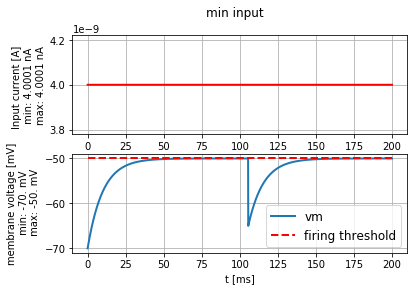

In [2]:
#Exercicio 1A
#Qual a mínima corrente aplicada necessária para que o neurônio produza disparos? 
# Calcule essa corrente usando a equação 2.11 do livro do Miller (ou equação 9 da aula 12 nas notas de aula)
# e depois simule o modelo com correntes aplicadas (i) ligeiramente menores e
# (ii) ligeiramente maiores que essa corrente mínima. Em cada caso, faça o gráfico do potencial de membrana, V(t), 
# por um intervalo de tempo de 200 ms (ou um intervalo entre disparos completo se este for mais longo). 

#Baseado na função simulate_LIF_neuron do arquivo LIF.py
"""Basic leaky integrate and fire neuron implementation.

Args:
    input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
    simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
    v_rest (Quantity): Resting potential: -70mV
    v_reset (Quantity): Reset voltage after spike - 65mV
    firing_threshold (Quantity) Voltage threshold for spiking -50mV
    membrane_resistance (Quantity): 10Mohm
    membrane_time_scale (Quantity): 8ms
    abs_refractory_period (Quantity): 2ms

Returns:
    StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
    SpikeMonitor: Biran2 SpikeMonitor
"""
v_rest= -70*b2.mV
v_reset= -65*b2.mV
membrane_resistance = 5 * b2.Mohm
membrane_capacitance = 2*b2.nF
firing_threshold = -50 * b2.mV

simulation_time = 200 
dt =  0.1 * b2.ms 

current = 4.0001 * b2.namp


input_current = input_factory.get_step_current(
    t_start=0, t_end=simulation_time, unit_time=b2.ms,
    amplitude= current) 

# differential equation of Leaky Integrate-and-Fire model
eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (input_current(t,i)/membrane_capacitance) ) : volt """

# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    1, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
    refractory=False, method="euler", dt = dt)
neuron.v = v_rest  # set initial value

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

graph_c, graph_c = plot_tools.plot_voltage_and_current_traces(
state_monitor, input_current, title="min input", firing_threshold=firing_threshold)
# for t in spike_monitor.t:
#    graph_c.axvline(t/b2.ms, ls='--', c='C1', lw=3)   
print("nr of spikes: {}".format(spike_monitor.count[0]))


nr of spikes: <spikemonitor_1.count: array([ 15,  48, 111, 128, 144, 159, 175, 181, 188, 195])>


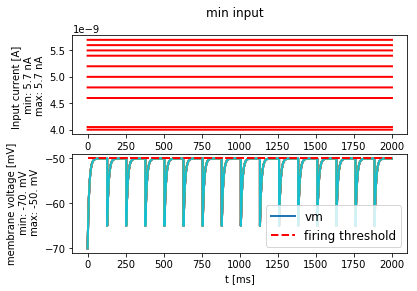

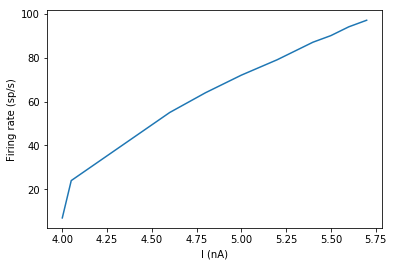

In [5]:
#exercicio 1B 
# Faça simulações com 10 valores diferentes de Iapp (todos acima da corrente mínima), 
# cada uma tendo 2 s de duração (vamos chamar cada simulações de um “teste”). 
# Para cada valor de corrente aplicada, faça o seu programa calcular a frequência média
# de disparos (f) do neurônio como o número de disparos durante a apresentação da corrente
# dividido pelo tempo em que ela é apresentada e, ao final, faça seu programa gerar o gráfico
# da frequência média de disparos versus a corrente aplicada (curva F-I) para o modelo. 
# Escolha valores de Iapp de maneira que as frequências f estejam no intervalo entre 0 e 100 Hz.

eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (input_current/membrane_capacitance) ) : volt 
input_current : amp
"""

simulation_time = 2
current = [4.00001, 4.05, 4.6, 4.8, 5., 5.2, 5.4, 5.5, 5.6, 5.7]
input_current = [None]*10
for i in range(len(current)):
    input_current[i] = input_factory.get_step_current(
        t_start=0, t_end=simulation_time, unit_time=b2.second,
        amplitude= current[i]*b2.nA) 
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
    refractory=False, method="euler", dt = dt)
neuron.v = v_rest  # set initial value
neuron.input_current = current*b2.nA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)
for i in range(len(current)):
    plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)

plt.figure(2)
print("nr of spikes: {}".format(spike_monitor.count))
plt.plot(neuron.input_current /b2.nA, spike_monitor.count/simulation_time)
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.show()